# 1 scipy简介

scipy是用于科学计算的python包，基于numpy。官网的介绍是这样的：

>SciPy (pronounced “Sigh Pie”) is a Python-based ecosystem of open-source software for mathematics, science, and engineering.

本教程内容来源于[scipy的官网](https://docs.scipy.org/doc/scipy/reference/)


# 2 Interpolation 插值

SciPy中有很多插值的工具，一维二维高维的都有。下面就将介绍几个。

## 2.1 1-D interpolation (interp1d)

interp1d类可以非常方便地创建插值函数，只要那些点是在域中被线性函数创建的。只要传入一维向量，就可以创建这个类的实例。

In [3]:
import numpy as np
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt

x = np.linspace(0, 10, num=11, endpoint=True)
y = np.cos(-x**2/9.0)
print(x)
print(y)
f = interp1d(x, y)
f2 = interp1d(x, y, kind='cubic')

[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]
[ 1.          0.99383351  0.90284967  0.54030231 -0.20550672 -0.93454613
 -0.65364362  0.6683999   0.67640492 -0.91113026  0.11527995]


In [4]:
xnew = np.linspace(0, 10, num=41, endpoint=True)
xnew

array([ 0.  ,  0.25,  0.5 ,  0.75,  1.  ,  1.25,  1.5 ,  1.75,  2.  ,
        2.25,  2.5 ,  2.75,  3.  ,  3.25,  3.5 ,  3.75,  4.  ,  4.25,
        4.5 ,  4.75,  5.  ,  5.25,  5.5 ,  5.75,  6.  ,  6.25,  6.5 ,
        6.75,  7.  ,  7.25,  7.5 ,  7.75,  8.  ,  8.25,  8.5 ,  8.75,
        9.  ,  9.25,  9.5 ,  9.75, 10.  ])

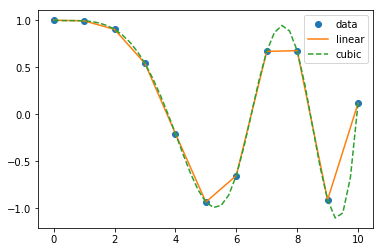

In [5]:
plt.plot(x, y, 'o', xnew, f(xnew), '-', xnew, f2(xnew), '--')
plt.legend(['data', 'linear', 'cubic'], loc='best')
plt.show()

 interp1d 还有另外一套插值，可以返回最近的，前面的，后面的x值

In [6]:
x = np.linspace(0, 10, num=11, endpoint=True)
y = np.cos(-x**2/9.0)
f1 = interp1d(x, y, kind='nearest')
f2 = interp1d(x, y, kind='previous')
f3 = interp1d(x, y, kind='next')

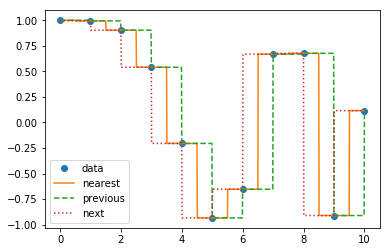

In [7]:
xnew = np.linspace(0, 10, num=1001, endpoint=True)

plt.plot(x, y, 'o')
plt.plot(xnew, f1(xnew), '-', xnew, f2(xnew), '--', xnew, f3(xnew), ':')
plt.legend(['data', 'nearest', 'previous', 'next'], loc='best')
plt.show()

## 2.2 Multivariate data interpolation (griddata)

现在我们要对2d的函数进行插值。首先创建这个函数

In [8]:
def func(x, y):
    return x*(1-x)*np.cos(4*np.pi*x) * np.sin(4*np.pi*y**2)**2

grid_x, grid_y = np.mgrid[0:1:100j, 0:1:200j]
grid_x, grid_y

(array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.01010101, 0.01010101, 0.01010101, ..., 0.01010101, 0.01010101,
         0.01010101],
        [0.02020202, 0.02020202, 0.02020202, ..., 0.02020202, 0.02020202,
         0.02020202],
        ...,
        [0.97979798, 0.97979798, 0.97979798, ..., 0.97979798, 0.97979798,
         0.97979798],
        [0.98989899, 0.98989899, 0.98989899, ..., 0.98989899, 0.98989899,
         0.98989899],
        [1.        , 1.        , 1.        , ..., 1.        , 1.        ,
         1.        ]]),
 array([[0.        , 0.00502513, 0.01005025, ..., 0.98994975, 0.99497487,
         1.        ],
        [0.        , 0.00502513, 0.01005025, ..., 0.98994975, 0.99497487,
         1.        ],
        [0.        , 0.00502513, 0.01005025, ..., 0.98994975, 0.99497487,
         1.        ],
        ...,
        [0.        , 0.00502513, 0.01005025, ..., 0.98994975, 0.99497487,
         1.        ],
        [0. 


但是我们只知道1000个点的值

In [9]:
points = np.random.rand(1000, 2)
values = func(points[:,0], points[:,1])
points, values

(array([[0.70551787, 0.2047583 ],
        [0.17959774, 0.24979303],
        [0.78108932, 0.80469342],
        ...,
        [0.86623819, 0.46894106],
        [0.88039939, 0.87188219],
        [0.45882527, 0.41609614]]),
 array([-4.45330634e-02, -4.65509099e-02, -1.45765028e-01, -4.88739051e-02,
        -7.07063948e-05,  3.32172809e-02, -6.63962979e-07,  3.57798555e-02,
         7.69529957e-05, -2.87682441e-02,  5.06367470e-04, -1.35363363e-01,
        -1.55273075e-01, -4.27995687e-02, -2.95933261e-03,  1.28539950e-01,
         1.87771410e-02, -3.36982820e-03,  1.78846204e-02, -5.24944239e-03,
        -4.91443679e-03,  5.79530210e-02, -1.19038174e-02,  5.10724186e-03,
        -7.51679097e-03,  9.38851867e-04, -1.08405821e-01,  1.55227578e-02,
         3.30085699e-03, -1.25011145e-01,  1.63303448e-04,  9.39312258e-02,
         1.63765427e-04,  1.88390207e-04, -3.80944043e-02, -1.12664357e-01,
         4.67726539e-06, -9.47698837e-02,  2.16687912e-01,  2.13574053e-01,
         5.95949157e-

然后我们用griddata的插值方法，我们在grid_x, grid_y构成的这些坐标上，对points和values进行插值，最终将返回一个曲面。

In [10]:
from scipy.interpolate import griddata
grid_z0 = griddata(points, values, (grid_x, grid_y), method='nearest')
grid_z1 = griddata(points, values, (grid_x, grid_y), method='linear')
grid_z2 = griddata(points, values, (grid_x, grid_y), method='cubic')

你可以看到这些方法的结果，cubin的结果是最好的。

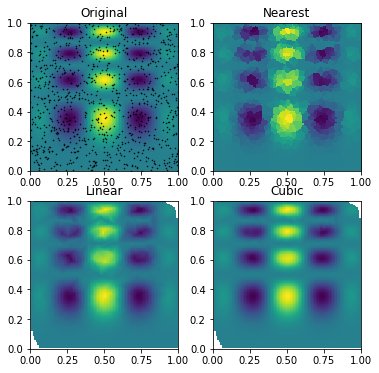

In [11]:
plt.subplot(221)
plt.imshow(func(grid_x, grid_y).T, extent=(0,1,0,1), origin='lower')
plt.plot(points[:,0], points[:,1], 'k.', ms=1)
plt.title('Original')
plt.subplot(222)
plt.imshow(grid_z0.T, extent=(0,1,0,1), origin='lower')
plt.title('Nearest')
plt.subplot(223)
plt.imshow(grid_z1.T, extent=(0,1,0,1), origin='lower')
plt.title('Linear')
plt.subplot(224)
plt.imshow(grid_z2.T, extent=(0,1,0,1), origin='lower')
plt.title('Cubic')
plt.gcf().set_size_inches(6, 6)
plt.show()

## 2.3 Spline interpolation 样条插值

Cubic-spline 可以看到几乎是完美地插值

In [12]:
from scipy import interpolate

x = np.arange(0, 2*np.pi+np.pi/4, 2*np.pi/8)
y = np.sin(x)
tck = interpolate.splrep(x, y, s=0)
xnew = np.arange(0, 2*np.pi, np.pi/50)
ynew = interpolate.splev(xnew, tck, der=0)

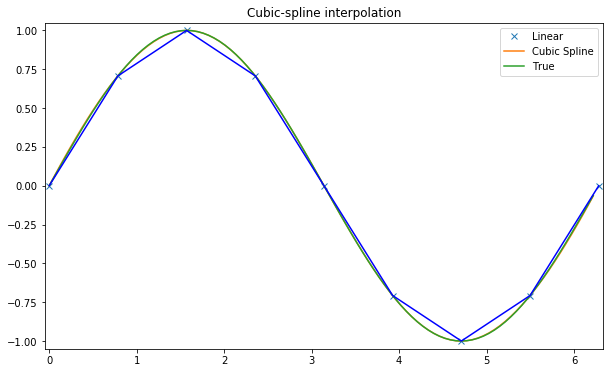

In [13]:
plt.figure(figsize=(10, 6))
plt.plot(x, y, 'x', xnew, ynew, xnew, np.sin(xnew), x, y, 'b')
plt.legend(['Linear', 'Cubic Spline', 'True'])
plt.axis([-0.05, 6.33, -1.05, 1.05])
plt.title('Cubic-spline interpolation')
plt.show()

Derivative of spline



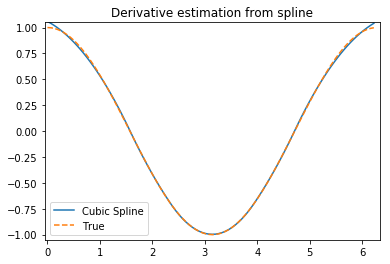

In [14]:
yder = interpolate.splev(xnew, tck, der=1)
plt.figure()
plt.plot(xnew, yder, xnew, np.cos(xnew),'--')
plt.legend(['Cubic Spline', 'True'])
plt.axis([-0.05, 6.33, -1.05, 1.05])
plt.title('Derivative estimation from spline')
plt.show()

Integral of spline



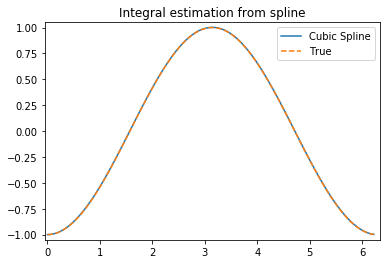

In [15]:
def integ(x, tck, constant=-1):
    x = np.atleast_1d(x)
    out = np.zeros(x.shape, dtype=x.dtype)
    for n in range(len(out)):
        out[n] = interpolate.splint(0, x[n], tck)
    out += constant
    return out

yint = integ(xnew, tck)
plt.figure()
plt.plot(xnew, yint, xnew, -np.cos(xnew), '--')
plt.legend(['Cubic Spline', 'True'])
plt.axis([-0.05, 6.33, -1.05, 1.05])
plt.title('Integral estimation from spline')
plt.show()

# 3 Integration 积分

scipy.integrate 提供了几种积分的技术，可以用help大致地看看。

In [16]:
import scipy.integrate as integrate
import scipy.special as special
help(integrate)

Help on package scipy.integrate in scipy:

NAME
    scipy.integrate

DESCRIPTION
    Integration and ODEs (:mod:`scipy.integrate`)
    
    .. currentmodule:: scipy.integrate
    
    Integrating functions, given function object
    
    .. autosummary::
       :toctree: generated/
    
       quad          -- General purpose integration
       dblquad       -- General purpose double integration
       tplquad       -- General purpose triple integration
       nquad         -- General purpose n-dimensional integration
       fixed_quad    -- Integrate func(x) using Gaussian quadrature of order n
       quadrature    -- Integrate with given tolerance using Gaussian quadrature
       romberg       -- Integrate func using Romberg integration
       quad_explain  -- Print information for use of quad
       newton_cotes  -- Weights and error coefficient for Newton-Cotes integration
       IntegrationWarning -- Warning on issues during integration
    
    Integrating functions, given fixed 

## 3.1 General integration (quad)

quad函数提供了单变量的单重积分。

下面是一个简单的积分$ \int_0^{4}2xdx$

In [17]:
result = integrate.quad(lambda x: 2*x, 0, 4)
result

(16.0, 1.7763568394002505e-13)

下面对 $ \int_0^{4.5}{J_{2.5}(x)}dx$进行计算

In [18]:
result = integrate.quad(lambda x: special.jv(2.5,x), 0, 4.5)
result

(1.1178179380783244, 7.866317216380707e-09)

## 3.2 General multiple integration(dblquad, tplquad, nquad)

双重，三重积分乃至多重积分用到的函数是dblquad, tplquad, nquad，下面看一个例子。

双重积分的计算
$$ \int_{y=0}^{1/2}\int_{x=0}^{1-2y}xydxdy = \frac{1}{96}$$

In [19]:
from scipy.integrate import dblquad
area = dblquad(lambda x, y: x*y, 0, 0.5, lambda x: 0, lambda x: 1-2*x)
area

(0.010416666666666668, 4.101620128472366e-16)

In [20]:
1/96

0.010416666666666666

或者是用nquad的方法

In [21]:
def f(x, y):
    return x*y

def bounds_y():
    return [0, 0.5]

def bounds_x(y):
    return [0, 1-2*y]

integrate.nquad(f, [bounds_x, bounds_y])

(0.010416666666666668, 4.101620128472366e-16)

# 4 Optimization  优化

scipy.optimize提供了常用的优化算法，help(scipy.optimize)可以看到详细的信息。下面还是举例子来说明简单的用法。

首先是最小化方法，我们对下面的式子进行最小化，式子的最小值是0，当x=1的时候达到。

![like](data/a.png)

In [22]:
from scipy.optimize import minimize

def rosen(x):
    """The Rosenbrock function"""
    return sum(100.0*(x[1:]-x[:-1]**2.0)**2.0 + (1-x[:-1])**2.0)

x0 = np.array([1.3, 0.7, 0.8, 1.9, 1.2])
res = minimize(rosen, x0, method='nelder-mead',
               options={'xtol': 1e-8, 'disp': True})

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 339
         Function evaluations: 571


In [23]:
print(res.x)

[1. 1. 1. 1. 1.]


如果调整参数method可以进行更多的优化算法，这里就不展开了。

# 5 线性代数

scipy.linalg拥有numpy.linalg所有的方法，还有一些更高级的方法，并且scipy通常比numpy更快，除非你不想在代码里添加scipy依赖，否则用scipy.linalg而不是numpy.linalg

## 5.1 逆矩阵


In [24]:
import numpy as np
from scipy import linalg
A = np.array([[1,3,5],[2,5,1],[2,3,8]])
A

array([[1, 3, 5],
       [2, 5, 1],
       [2, 3, 8]])

In [25]:
linalg.inv(A)

array([[-1.48,  0.36,  0.88],
       [ 0.56,  0.08, -0.36],
       [ 0.16, -0.12,  0.04]])

In [26]:
A.dot(linalg.inv(A)) #double check

array([[ 1.00000000e+00, -1.11022302e-16, -6.24500451e-17],
       [ 3.05311332e-16,  1.00000000e+00,  1.87350135e-16],
       [ 2.22044605e-16, -1.11022302e-16,  1.00000000e+00]])

虽然求出来并不是完全的单位矩阵，但是非常接近，对角线上都是1，其他地方都很接近0，这是浮点运算没有办法避免的情况。

## 5.2 求解线性方程

下面有两个矩阵

In [27]:
A = np.array([[1, 2], [3, 4]])
A

array([[1, 2],
       [3, 4]])

In [28]:
b = np.array([[5], [6]])
b

array([[5],
       [6]])

我们知道要求解Ax=B的话，只需要两边同乘A的逆即可

In [29]:
linalg.inv(A).dot(b)

array([[-4. ],
       [ 4.5]])

linalg.inv(A).dot(b)就是x的值，下面验算一下Ax-B是不是等于0

In [30]:
A.dot(linalg.inv(A).dot(b)) - b

array([[0.00000000e+00],
       [1.77635684e-15]])

## 5.3 行列式

In [31]:
A = np.array([[1,2],[3,4]])
A

array([[1, 2],
       [3, 4]])

In [32]:
linalg.det(A)

-2.0